# First steps with Python

In this example, we showcase iPython Notebook as a suitable solution for modeling and data analysis in Synthetic Biology. This will be a super-fast introduction to the language and major points in order to get anyone started with their own projects. 

This is intended as a suplementary material for iGEM competition. You can contact our team (Team USP Brazil) if you would like a live demonstration!! If needed, the following references might be useful:

* Learning Python, by Mark Lutz (O'Reily, 2013)

# Hello world

In every programming language, the "hello world" program/script is usually a small piece of code that shows how to implement a simple program that prints on the screen "Hello world". This is a common way to get a first glimpse of the how the langauge you're planning to learn looks like.

In [1]:
print 'Hello world'

Hello world


As you can see, whenever you want to print anything on your screen, simply use "print" keyword.

<i>Disclaimer:</i> in case of error here, check whether you are using Python3 instead of Python2. In Python3, print is a function and should be called like <i>print('Hellow world')</i> instead.

# Importing libraries

To import packages or libraries, simply use <i>import</i> keyword. For simplicity, you can create an alias to that library name using <i>as</i> keyword. Bellow a few examples.

Plotting:

In [3]:
%matplotlib inline
import pylab as pl

Fast numerical calculations:

In [4]:
from math import *
import numpy as np

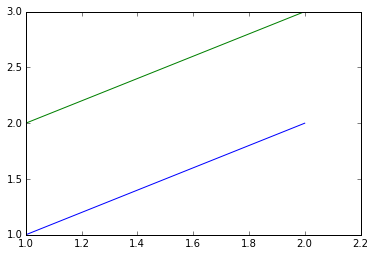

In [5]:
pl.plot([1,2],[1,2], '-')
pl.plot([1,2],[2,3], '-')

Pretty data sheets:

In [4]:
import pandas as pd

In case you experience errors in the previous commands, simply try to install the packages we are trying to call. Under windows, you can use Anaconda package manager for this purpose.

In most linux systems software managers, python packages are usually named <i>python-[PACKAGE-NAME]</i>. For instance, <i>numpy</i> is usually <i>pyhon-numpy</i>.

# First steps

Example of creating an variable:

In [5]:
X = 1
Y = 2
Z = X + Y
print Z

3


We can create similarly lists of variables:

In [6]:
X = [1,2,3,4]
Y = [4.2,5.6,6,7]
print X
print X+Y

[1, 2, 3, 4]
[1, 2, 3, 4, 4.2, 5.6, 6, 7]


Did you notice anything strange? Yep, X+Y is not the sum of the "vectors" X and Y, but the <b>concatenation</b> (juxtaposition). That is because lists are not vecotrs:

In [7]:
type(X)

list

In a moment, we'll get to "vectors".

There are however more efficient ways to create and manipulate arrays. For instance, to create and array that starts at 3 and goes up to 10, you can use <i>range</i> function.

In [8]:
range(3, 10+1)

[3, 4, 5, 6, 7, 8, 9, 10]

Notice that we used 10+1 instead of 10 in <i>range</i>.

To manipulate vectors, arrays and matrices, you should use numpy. It efficiently implements all matrix operations for you and has an easy-to-understand interface.

Check below how we create a vector from 0 to 20, with an interval of 0.5.

In [9]:
X = np.arange(0.,20.,0.5)
print 'Type of X: ', type(X)
print X

Type of X:  <type 'numpy.ndarray'>
[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5]


Notice that we are calling the function np.arange to create this vector (whose type is something different than a list). The actual function is called <i>arange</i>, while <i>np</i> is actually telling Python that this function should be inside numpy library (whose alias is <i>np</i>). 

We can also create vectors filled with (pseudo) random numbers, distributed under virtually any probability distribution. Let's use a normal distribution and draw 20/0.5 = 40 random numbers. To do so, we will call <i>random.standard_normal</i> from numpy:

In [10]:
Y = np.random.standard_normal(40)
print Y

[-0.39468921 -0.06118093  0.3529008  -0.61652296  0.5338401  -1.74906193
 -0.63994231 -0.3183167  -0.92439256 -0.49317661  0.5136185  -0.04224558
 -2.35544311 -0.79587783  0.62496679 -0.25055317 -1.81597025  1.58121886
 -1.08994459  0.47865248  0.95632292  0.47763132  0.50399733  0.0084841
 -0.69519021 -0.21327215  1.10131645  0.40968492  0.46375811  0.52450706
 -0.51236311  0.59395476 -0.40344756 -1.27756109 -2.35559685 -0.33831538
  1.22561658  0.8704694  -0.92284817 -0.64625971]


Whenever you create variables, in Python they are understood as objects (as in Object-Oriented languages). In particular, objects have something called <b>fields</b>, that are like additional variables attached to that object. <b>For instance:</b> Every numpy.array type has a field that shows its dimensions. For instance, how many elements do X and Y have?

In [11]:
print X.shape, Y.shape

(40,) (40,)


This shows us that X and Y have only one dimension (i.e., are vectors) and each have 40 elements.

Objects also have <b>methods</b>: functions that perform some task on the object itself. Since they are functions, you must call it using parenthesis to pass their arguments. <b>For instance:</b> Each numpy.array has a method called <i>mean()</i>, which naturally evaluates the average value of the elements in this vector. Let's give it a try!

In [12]:
print X.mean()
print Y.mean()

9.75
-0.192280786765


It is easy to check that these are the actual average values of the elements of each of our vectors.

Evidently, we usually store values on a vectors or matrices because we want to plot them. <i>pylab</i> library can be used to quickly construct beautiful plots:

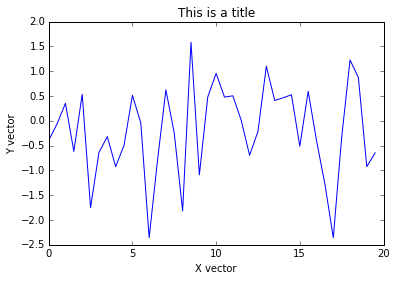

In [13]:
pl.plot(X, Y)
pl.title('This is a title')
pl.xlabel('X vector')
pl.ylabel('Y vector')
pl.show()

Let's calculate some propertis of Y.

Average value:  -0.192280786765
Variance:  0.841319454578
Stand. deviation:  0.917234678028
Histogram:


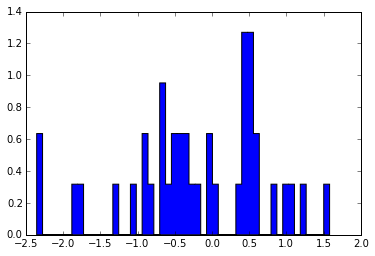

In [14]:
print 'Average value: ', Y.mean()
print 'Variance: ', Y.var()
print 'Stand. deviation: ', sqrt(Y.var())
print 'Histogram:'
pl.hist(Y, 50, normed=1, histtype='stepfilled');
pl.show()

Of course, the above histogram doesn't look good. This is simply due the poor sampling, however the method to construct histograms is that simple: a function from <i>pylab</i> library. In the next sections, we will use a known dataset and properly illustrate it again.

You can use \t to add tabs and line everything up. You can also use \n as linebreak.

In [15]:
print 'Average value: \t\t', Y.mean()
print 'Variance: \t\t', Y.var()
print 'Stand. deviation: \t', sqrt(Y.var())

Average value: 		-0.192280786765
Variance: 		0.841319454578
Stand. deviation: 	0.917234678028


In [16]:
print Y[:2]
print Y[:5]
print Y[:8]

[-0.39468921 -0.06118093]
[-0.39468921 -0.06118093  0.3529008  -0.61652296  0.5338401 ]
[-0.39468921 -0.06118093  0.3529008  -0.61652296  0.5338401  -1.74906193
 -0.63994231 -0.3183167 ]


In [17]:
for y in Y[:5]:
    print 'Squared: ', y**2

Squared:  0.155779571584
Squared:  0.00374310569401
Squared:  0.124538974856
Squared:  0.380100558988
Squared:  0.284985247216


# Functions

We next introduce how you define a function. Suppose you want to define a Hill Function, which is readily
$$F_{k,n}(x) = \frac{1}{1+\dfrac{k^n}{x^n}},$$
where $k$ and $n$ are constants you can adjust to fit your data.

In [18]:
def Hill(X, K = 1.0, n = 2.0):
    return 1./(1. + (K/X)**(n))

As you can see, we have three arguments:
* X - a number of an array with values where we want to evalute the Hill function
* K, n - is the k in our above definition

Notice that K and n are defined differently. 

We can then calculate it on some values...

In [19]:
X = np.arange(0.,10.,1.0)
HX = Hill(X)
print HX

[ 0.          0.5         0.8         0.9         0.94117647  0.96153846
  0.97297297  0.98        0.98461538  0.98780488]


And plot it...

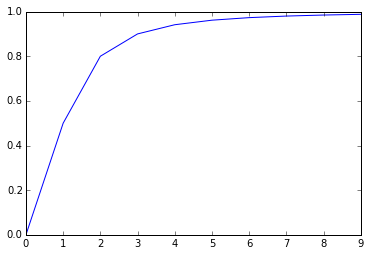

In [20]:
pl.plot(X, HX)

To improve the quality of the curve (make it more smooth), we can increase the number of points in X. Nevertheless, we don't want to change the interval. Therefore, we will only change the step from 1.0 to 0.1, ending up with ten times more points.

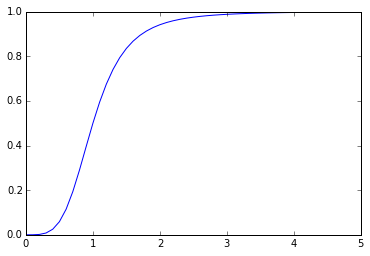

In [21]:
X = np.arange(0.,5.,0.1)
pl.plot(X, Hill(X, n=4.))

You may experience an error: division by zero (0). That happens because in X we have a zero element, and it will try to evaluate the Hill function in zero. To avoid this, we will slightly change our function:

In [22]:
def Hill_complete(X, K = 1.0, n = 2.0):
    XX = X
    XX[ X == 0 ] = 1e-20
    return 1./(1. + (K/XX)**(n))

As you can see, whenever the argument is zero, we switched it by a very small real number. Since the function is continuous, it will "look nice" near zero.

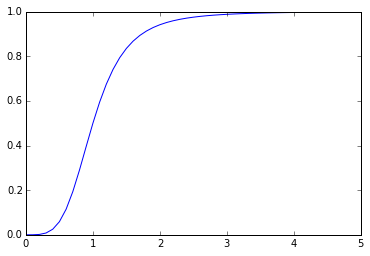

In [23]:
X = np.arange(0.,5.,0.1)
pl.plot(X, Hill_complete(X, n=4.))

### $K$ and $n$ parameters

What exactly represent $K$ and $n$ parameters? Let's use our function to briefly investigate these two parameters and learn how to manipulate functions in Python.

Let's start with $n$ below.

In [24]:
# We start re-defining our x-axis
X = np.arange(0.05,5.,0.01)

(-0.1, 1.1)

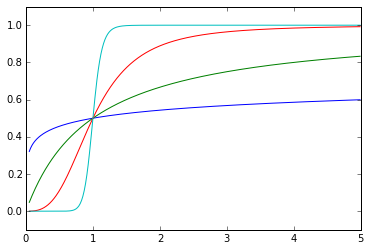

In [25]:
for n in [0.25, 1.0, 3.0, 15.]:
    pl.plot(X, Hill_complete(X, n=n))

pl.ylim(-0.1,1.1)

As you can see, as $n$ grows the the growth part of the curve becomes steeper and steeper. Depending on the context, this parameter is linked to the <i>cooperativity</i> among the parts being modeled. When $n\to\infty$, we will have a Heaviside step function, as shown below (with $n = 10^7$).

(-0.1, 1.1)

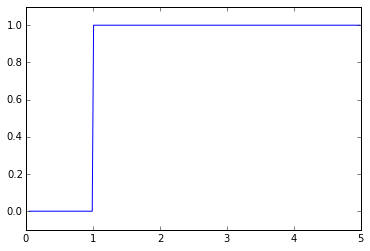

In [26]:
pl.plot(X, Hill_complete(X, n=1000000.))
pl.ylim(-0.1,1.1)

Let's try changing $K$. In this context, $K$ means the concentration of the ligand where half of the binding sites are occupied.

(-0.1, 1.1)

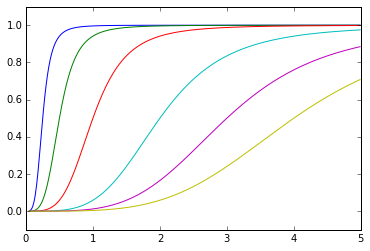

In [27]:
for k in [0.25, 0.5, 1.0, 2.0, 3.0, 4.0]:
    pl.plot(X, Hill_complete(X, n=4., K=k))

pl.ylim(-0.1,1.1)

To understand it visually, we can show with a dashed line where $K$ is in the graph.

(-0.1, 1.1)

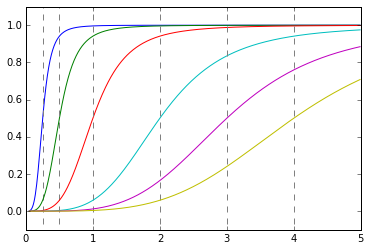

In [28]:
for k in [0.25, 0.5, 1.0, 2.0, 3.0, 4.0]:
    pl.plot(X, Hill_complete(X, n=4., K=k))
    pl.plot([k,k], [-0.2, 1.2], '--', color=(0.5, 0.5, 0.5))

pl.ylim(-0.1,1.1)

## Inverse behavior

Hill function is broadly used to represent gene expression when the promoter positively impacts the production of mRNA. However, there are promoters that inhibit the gene transcription. In this case, it is common to use the Hill Function, but inverting the variable:
$$F_{k,n}(x) = \frac{1}{1+\dfrac{x^n}{k^n}}.$$
To get more experience with Python programming, let's redefine our function to quickly inspect this new function.

In [29]:
def repressorHill(X, K = 1.0, n = 2.0):
    XX = X
    XX[ X == 0 ] = 1e-20
    return 1./(1. + (XX/K)**(n))

(-0.1, 1.1)

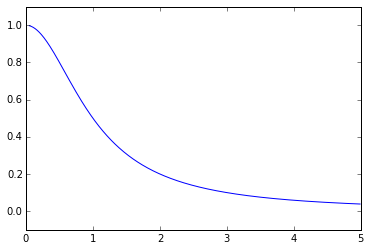

In [31]:
X = np.arange(0.05,5.,0.01)
pl.plot(X, repressorHill(X, n=2.))
pl.ylim(-0.1,1.1)

As you can see, this new function decreases with its argument smoothly. With $n\to \infty$, it becomes another step function, but with oposite behavior.

(-0.1, 1.1)

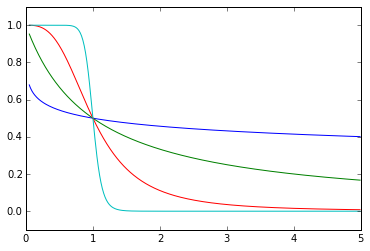

In [30]:
for n in [0.25, 1.0, 3.0, 15.]:
    pl.plot(X, repressorHill(X, n=n))

pl.ylim(-0.1,1.1)

(-0.1, 1.1)

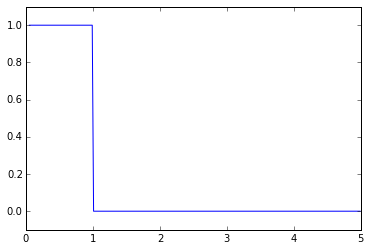

In [33]:
pl.plot(X, repressorHill(X, n=1000000.))
pl.ylim(-0.1,1.1)

As for the $K$ parameter, the same holds.

(-0.1, 1.1)

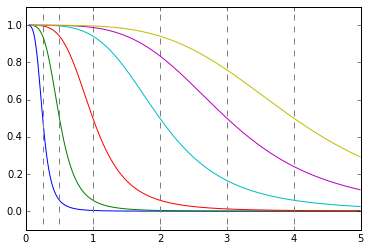

In [35]:
for k in [0.25, 0.5, 1.0, 2.0, 3.0, 4.0]:
    pl.plot(X, repressorHill(X, n=4., K=k))
    pl.plot([k,k], [-0.2, 1.2], '--', color=(0.5, 0.5, 0.5))

pl.ylim(-0.1,1.1)

# Manipulating data sheets

Next, we will create a DataFrame, which will store all data we want to work on for us. Since we often have large datasets, we don't want to print all dataset in the screen, but have a feeling of what's in a particular DataFrame. For this purpose, you can use the <i>head()</i> method as below. Then, python will only print the first 5 rows of your DataFrame.

In [236]:
df = pd.DataFrame({
        'K = 0.5' : Hill_complete(X, n=4., K=0.5), 
        'K = 1.0' : Hill_complete(X, n=4., K=1.0), 
        'K = 1.5' : Hill_complete(X, n=4., K=1.5),
        'K = 2.0' : Hill_complete(X, n=4., K=2.5)
    })

df.head()

,K = 0.5,K = 1.0,K = 1.5,K = 2.0
0,1.600000e-79,1.000000e-80,1.975309e-81,2.560000e-82
1,9.999000e-05,6.249961e-06,1.234566e-06,1.600000e-07
2,1.597444e-03,9.999000e-05,1.975270e-05,2.559993e-06
3,8.034917e-03,5.059938e-04,9.999000e-05,1.295983e-05
4,2.496100e-02,1.597444e-03,3.159495e-04,4.095832e-05


We can easily plot 

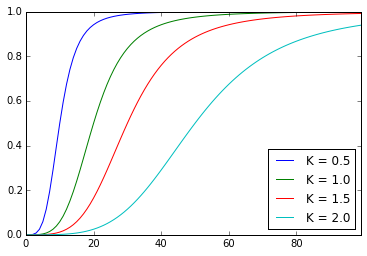

In [237]:
df.plot()

We see here the average value of each curve:

In [238]:
df.mean()

K = 0.5    0.883962
K = 1.0    0.773397
K = 1.5    0.664515
K = 2.0    0.460232
dtype: float64

We now evaluate the variance of each curve.

In [239]:
df.var()

K = 0.5    0.075595
K = 1.0    0.121473
K = 1.5    0.143790
K = 2.0    0.130946
dtype: float64

Exporting to CSV (excell compatiable).

In [222]:
df.to_csv('Test.csv')

In [223]:
more Test.csv

# Data analysis